In [2]:
#Introduction to CNN

In [2]:
#get the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [3]:
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()
#images are from the Food101 dataset in Kaggle
#but we are using only 2 classe : pizza and steak!

In [4]:
#inspect the data

!ls pizza_steak


test  train


In [6]:
!ls pizza_steak/train

pizza  steak


In [7]:
!ls pizza_steak/train/steak


1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os

#list number of files

for dirpath, dirname, filename in os.walk('pizza_steak'):
    print(f"There are {len(dirname)} directories and {len(filename)} images in  '{dirpath}'.")


There are 2 directories and 0 images in  'pizza_steak'.
There are 2 directories and 0 images in  'pizza_steak/test'.
There are 0 directories and 250 images in  'pizza_steak/test/pizza'.
There are 0 directories and 250 images in  'pizza_steak/test/steak'.
There are 2 directories and 0 images in  'pizza_steak/train'.
There are 0 directories and 750 images in  'pizza_steak/train/pizza'.
There are 0 directories and 750 images in  'pizza_steak/train/steak'.


In [9]:
#so like total of 1000 images
#another way to get number of images

len(os.listdir("pizza_steak/train/steak"))

750

In [5]:
#lets visualizeee

#get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
#create list of class_names from sub dirs

print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder = target_dir + target_class
    
    #get the random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    #read in the image
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") #show the image shape (width height and color channels)
    
    return img

Image shape: (384, 512, 3)


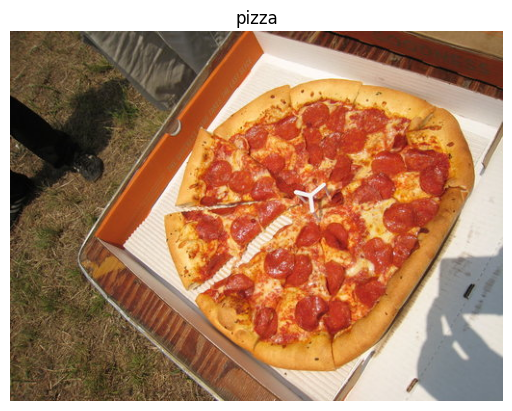

In [12]:
#view a random image from training dataset
img = view_random_image(target_class="pizza",target_dir="pizza_steak/test/")

In [14]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 72,  53,  36],
        [ 82,  63,  46],
        [ 80,  63,  47],
        ...,
        [167,  97,  45],
        [164,  97,  42],
        [163,  96,  41]],

       [[ 79,  61,  41],
        [ 82,  64,  44],
        [ 81,  62,  45],
        ...,
        [163, 100,  59],
        [162,  97,  57],
        [162,  94,  55]],

       [[ 72,  49,  31],
        [ 71,  48,  30],
        [ 71,  50,  31],
        ...,
        [151, 105,  71],
        [149, 100,  68],
        [147,  96,  65]],

       ...,

       [[101,  64,  37],
        [127,  92,  64],
        [123,  89,  62],
        ...,
        [114, 125, 131],
        [113, 124, 130],
        [113, 124, 130]],

       [[102,  75,  48],
        [117,  91,  64],
        [111,  87,  61],
        ...,
        [114, 125, 131],
        [113, 124, 130],
        [113, 124, 130]],

       [[100,  84,  59],
        [ 97,  83,  57],
        [ 92,  80,  54],
        ...,
        [114, 125, 13

In [15]:
#get all pixel values btw 0 and 1 (normalisation)
img/255

array([[[0.28235294, 0.20784314, 0.14117647],
        [0.32156863, 0.24705882, 0.18039216],
        [0.31372549, 0.24705882, 0.18431373],
        ...,
        [0.65490196, 0.38039216, 0.17647059],
        [0.64313725, 0.38039216, 0.16470588],
        [0.63921569, 0.37647059, 0.16078431]],

       [[0.30980392, 0.23921569, 0.16078431],
        [0.32156863, 0.25098039, 0.17254902],
        [0.31764706, 0.24313725, 0.17647059],
        ...,
        [0.63921569, 0.39215686, 0.23137255],
        [0.63529412, 0.38039216, 0.22352941],
        [0.63529412, 0.36862745, 0.21568627]],

       [[0.28235294, 0.19215686, 0.12156863],
        [0.27843137, 0.18823529, 0.11764706],
        [0.27843137, 0.19607843, 0.12156863],
        ...,
        [0.59215686, 0.41176471, 0.27843137],
        [0.58431373, 0.39215686, 0.26666667],
        [0.57647059, 0.37647059, 0.25490196]],

       ...,

       [[0.39607843, 0.25098039, 0.14509804],
        [0.49803922, 0.36078431, 0.25098039],
        [0.48235294, 0

In [16]:
img.shape

(384, 512, 3)

In [18]:
#find patterns in our images

#load images
#preprocess
#build a CNN 
#compile our CNN
#fit the CNN to training data

In [17]:
# we are building our model based on TinyVGG

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to data dirs
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

#build CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#len(train_data) == 47 as 1500 images / 32  = 47 batches in the training data set

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-04-06 15:36:02.630433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-06 15:36:03.553590: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-06 15:36:03.563328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63083520 exceeds 10% of free system memory.
2023-04-06 15:36:03.643711: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 61952000 exceeds 10% of free system memory.
2023-04-06 15:36:03.675583: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 15488000 exceeds 10% of free system memory.


47/47 [==============================] - 50s 1s/step - loss: 0.6685 - accuracy: 0.6147 - val_loss: 0.5215 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 50s 1s/step - loss: 0.4980 - accuracy: 0.7767 - val_loss: 0.4019 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4461 - accuracy: 0.8033 - val_loss: 0.3769 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.4074 - accuracy: 0.8193 - val_loss: 0.3300 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 41s 861ms/step - loss: 0.3735 - accuracy: 0.8540 - val_loss: 0.3141 - val_accuracy: 0.8740


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [54]:
#using the same model as before

#setting seed
tf.random.set_seed(42)

#making the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])


#compiling the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 207ms/step - loss: 0.7129 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [56]:
#accuracy isnt that great the CNN had a better accuracy
#lets try again
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 337ms/step - loss: 1.9845 - accuracy: 0.6447 - val_loss: 1.2846 - val_accuracy: 0.5640
Epoch 2/5
47/47 [==============================] - 15s 310ms/step - loss: 0.7845 - accuracy: 0.6980 - val_loss: 0.5489 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 14s 303ms/step - loss: 0.8266 - accuracy: 0.6987 - val_loss: 0.4672 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 14s 304ms/step - loss: 0.5470 - accuracy: 0.7567 - val_loss: 0.6108 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 15s 312ms/step - loss: 0.5269 - accuracy: 0.7660 - val_loss: 0.5312 - val_accuracy: 0.7320


In [57]:
#accuracy of 52 percent is just bogus, however, we got an accuracy of 73 percent in our validation data
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [58]:
#yes model 3 has 600,000 trainable params and model 1 had like 30,000  still it struggled so badly
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [59]:
#bruhhhhh 15 million trainable parameters?!

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


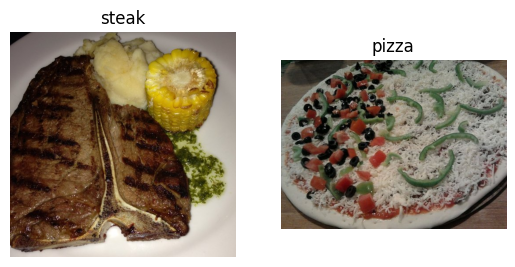

In [67]:
#BINARY CLASSIFICATION


#MODEL 1 was a CNN with 31,000 params. Although small in number, they were enough to get that 80 percent + accuracy

#lets break it down!

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_class="steak", target_dir="pizza_steak/train/")
plt.subplot(1,2,2)
pizza_img = view_random_image(target_class="pizza", target_dir="pizza_steak/train/")

In [70]:
#PREPROCESS THE DATA

#train and test dataset
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#next step is to turn our data into batches, which will help the CPU to process the images faster as its taking in bulk and not one by one
#ideally batch size 32 is best

#create train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory
                                               target_size=(224,224), #target size (height, width)
                                               class_mode="binary", #type of data
                                               batch_size=32) #size of mini batches


test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                               target_size=(224,224), 
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
